In [ ]:
import numpy as np 
import pandas as pd

In [ ]:
from google.colab import files
import io

def upload_files():
    uploaded = files.upload()
    for filename in uploaded.keys():
        print(f'Uploaded file "{filename}" with length {len(uploaded[filename])} bytes')
    return uploaded
uploaded = upload_files()
import pandas as pd

inf = 'PCOS_infertility.csv'  # Replace with the name of your CSV file
PCOS_inf = pd.read_csv(io.StringIO(uploaded[inf].decode('utf-8')))
import pandas as pd

uploaded = upload_files()
winf = 'PCOS_data_without_infertility.xlsx'  # Replace with the name of your XLSX file
sheet_name = 'Full_new'  # Replace with the name of the sheet you want to read

PCOS_woinf = pd.read_excel(io.BytesIO(uploaded[winf]), sheet_name=sheet_name)


Saving PCOS_infertility.csv to PCOS_infertility.csv
Uploaded file "PCOS_infertility.csv" with length 15378 bytes


Saving PCOS_data_without_infertility.xlsx to PCOS_data_without_infertility.xlsx
Uploaded file "PCOS_data_without_infertility.xlsx" with length 125274 bytes


## Data Preprocessing

In [ ]:
data = pd.merge(PCOS_woinf, PCOS_inf, on='Patient File No.', suffixes=('', '_y'), how='left')

data =data.drop(['Unnamed: 44', 'Sl. No_y', 'PCOS (Y/N)_y', '  I   beta-HCG(mIU/mL)_y',
       'II    beta-HCG(mIU/mL)_y', 'AMH(ng/mL)_y'], axis=1)

data.head() 

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [ ]:
# Mendistribusi data 
print(data.groupby('PCOS (Y/N)').size())

PCOS (Y/N)
0    364
1    177
dtype: int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [ ]:
data.isna().sum()

Sl. No                    0
Patient File No.          0
PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     1
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)     

In [ ]:
data["AMH(ng/mL)"].head() 

0    2.07
1    1.53
2    6.63
3    1.22
4    2.26
Name: AMH(ng/mL), dtype: object

In [ ]:
data["II    beta-HCG(mIU/mL)"].head()

0      1.99
1      1.99
2    494.08
3      1.99
4    801.45
Name: II    beta-HCG(mIU/mL), dtype: object

## Transformasi Data

In [ ]:
data["AMH(ng/mL)"] = pd.to_numeric(data["AMH(ng/mL)"], errors='coerce')
data["II    beta-HCG(mIU/mL)"] = pd.to_numeric(data["II    beta-HCG(mIU/mL)"], errors='coerce')

In [ ]:
data['Marraige Status (Yrs)'].fillna(data['Marraige Status (Yrs)'].median(),inplace=True)
data['Fast food (Y/N)'].fillna(data['Fast food (Y/N)'].median(),inplace=True)
data['II    beta-HCG(mIU/mL)'].fillna(data['II    beta-HCG(mIU/mL)'].median(),inplace=True)
data['AMH(ng/mL)'].fillna(data['AMH(ng/mL)'].median(),inplace=True)

data.columns = [col.strip() for col in data.columns]
data.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', 'Age (yrs)', 'Weight (Kg)',
       'Height(Cm)', 'BMI', 'Blood Group', 'Pulse rate(bpm)',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       'I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3   Age (yrs)               541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   541 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

## Exploratory Data Analysis

In [ ]:
data.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,271.000000,0.327172,31.430684,59.637153,156.484835,24.311285,13.802218,73.247689,19.243993,...,0.489834,0.515712,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,4.056399,1.840812,4.430285,1.688629,...,0.500359,0.500216,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,21.641274,13.000000,72.000000,18.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,271.000000,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,26.634958,15.000000,74.000000,20.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


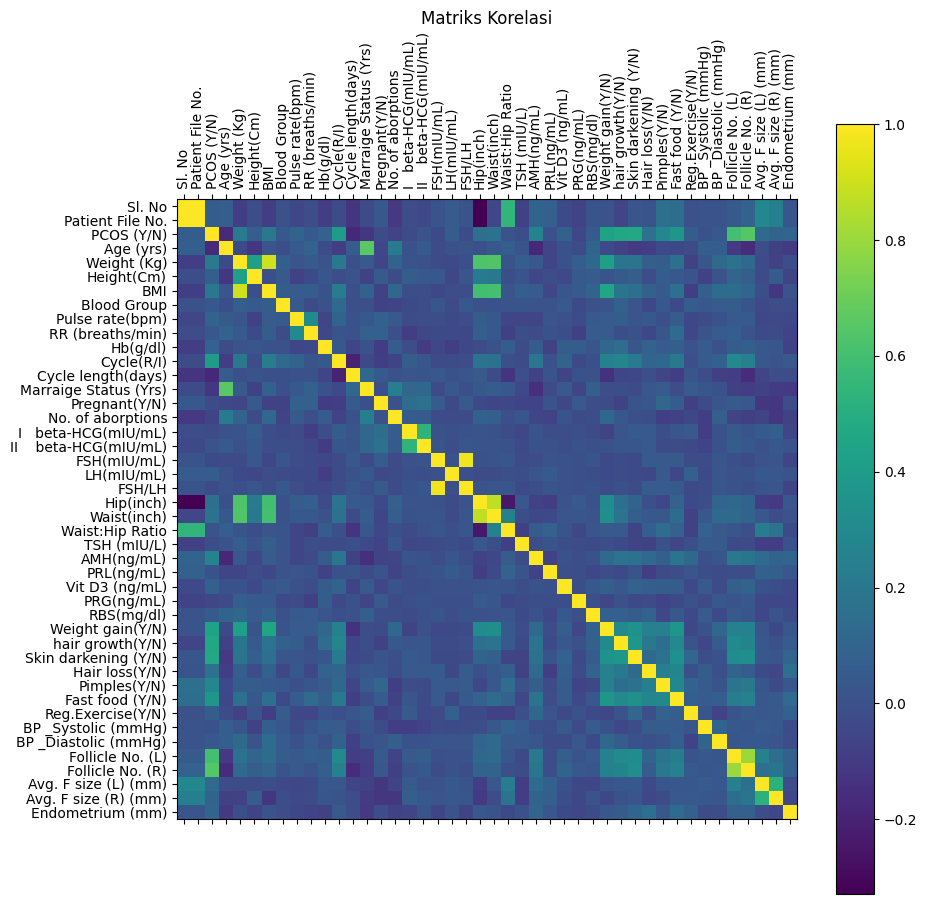

In [ ]:
import matplotlib.pyplot as plt

# Membuat matriks korelasi
corr_matrix = data.corr()

# Membuat figure dengan ukuran 10x10 inch
fig = plt.figure(figsize=(10, 10))

# Menambahkan subplots pada figure
ax = fig.add_subplot(111)

# Menampilkan heatmap dari matriks korelasi dengan keterangan variabel
cax = ax.matshow(corr_matrix)
fig.colorbar(cax)

# Menambahkan keterangan pada heatmap
ax.set_xticks(range(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation=90)
ax.set_yticks(range(len(corr_matrix.columns)))
ax.set_yticklabels(corr_matrix.columns)

# Menambahkan judul pada heatmap
plt.title('Matriks Korelasi')

# Menampilkan heatmap dengan ukuran yang telah ditentukan
plt.show()

In [ ]:
# Outlier

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import stats


# Memisahkan fitur dan label
X = data.drop('PCOS (Y/N)', axis=1)
y = data['PCOS (Y/N)']

# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Membuat objek PCA
pca = PCA()

# Menyesuaikan objek PCA dengan data
pca.fit(X_scaled)

# Mengubah data menjadi komponen utama
X_pca = pca.transform(X_scaled)

# deteksi outlier dengan metode Z-score pada komponen utama pertama
z_scores = stats.zscore(X_pca[:, 0])
outliers = np.where(np.abs(z_scores) > 3)

print("Indeks outlier:", outliers[0])
data_clean = data.drop(outliers[0], axis=0)



Indeks outlier: [337 477]


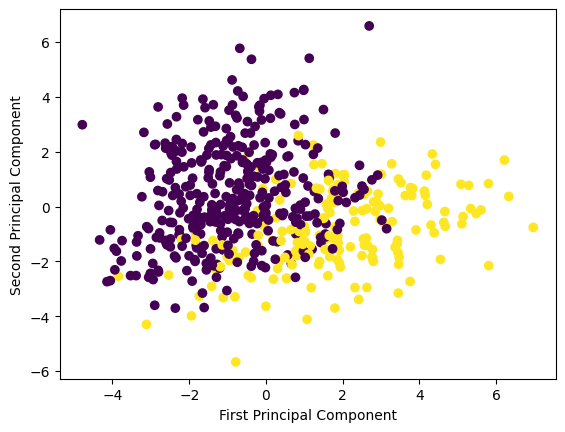



Explained variance ratio: [1.00081738e-01 7.81458160e-02 5.43337516e-02 4.71331253e-02
 4.46744095e-02 4.04375785e-02 3.54513487e-02 3.38692342e-02
 3.00685745e-02 2.90061489e-02 2.79093080e-02 2.65079436e-02
 2.62831360e-02 2.49572214e-02 2.46990747e-02 2.40349844e-02
 2.31189280e-02 2.25469753e-02 2.15593231e-02 2.13599499e-02
 2.06037540e-02 1.99793267e-02 1.92259971e-02 1.80341266e-02
 1.75429898e-02 1.73326717e-02 1.59801930e-02 1.54502922e-02
 1.51950393e-02 1.38497448e-02 1.35654755e-02 1.30305018e-02
 1.17974760e-02 1.11463318e-02 1.07050638e-02 1.05160045e-02
 8.85016116e-03 6.64477178e-03 3.69196729e-03 6.01557021e-04
 5.54101473e-05 2.25742105e-05 4.18403372e-33]


Principal components: [[-3.28442821e-02 -3.28442821e-02 -5.36056916e-02 ...  3.24958299e-02
  -2.49919050e-04  4.84112498e-02]
 [-4.16175470e-01 -4.16175470e-01  8.49315481e-02 ... -2.67577966e-01
  -2.51596668e-01 -6.02690252e-02]
 [ 3.15092629e-01  3.15092629e-01  3.42536396e-01 ...  9.99028315e-02
   5.157800

In [ ]:
import matplotlib.pyplot as plt

# 1. Visualisasi data
# Membuat plot scatter dari dua komponen utama pertama
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

print('\n')

# 2. Varians yang dijelaskan
# Menampilkan persentase varians yang dijelaskan oleh setiap komponen utama
print('Explained variance ratio:', pca.explained_variance_ratio_)

print('\n')

# 3. Komponen utama
# Menampilkan koefisien dari setiap komponen utama
print('Principal components:', pca.components_)

## Pembuatan Model

In [ ]:
from sklearn.model_selection import train_test_split

# Menetapkan fitur (X) dan target (y)

X=data_clean.drop(["PCOS (Y/N)","Sl. No","Patient File No."],axis = 1) # Menghapus indeks dari fitur juga
y=data_clean["PCOS (Y/N)"]

# Split data menjadi data training dan testing

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1) 

## Prediksi dan Evaluasi Performa Model

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Membuat dan melatih model Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Membuat prediksi pada data testing
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menghitung classification report
report = classification_report(y_test, y_pred)

In [ ]:
print("Accuracy: ", accuracy)
print("\n")
print("Confusion Matrix:\n", cm)
print("\n")
print("Classification Report:\n", report)

Accuracy:  0.8827160493827161


Confusion Matrix:
 [[105   9]
 [ 10  38]]


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.92       114
           1       0.81      0.79      0.80        48

    accuracy                           0.88       162
   macro avg       0.86      0.86      0.86       162
weighted avg       0.88      0.88      0.88       162



## 80:20 dan 60:40

In [ ]:
# Pembuatan Model 80:20
from sklearn.model_selection import train_test_split

# Menetapkan fitur (X) dan target (y)
X=data_clean.drop(["PCOS (Y/N)","Sl. No","Patient File No."],axis = 1) # Menghapus indeks dari fitur juga
y=data_clean["PCOS (Y/N)"]

# Split data menjadi data training dan testing
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1) 

# Prediksi dan Evaluasi Performa Model
from sklearn.naive_bayes import GaussianNB

# Membuat dan melatih model Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Membuat prediksi pada data testing
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menghitung classification report
report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("\n")
print("Confusion Matrix:\n", cm)
print("\n")
print("Classification Report:\n", report)

Accuracy:  0.8425925925925926


Confusion Matrix:
 [[63  7]
 [10 28]]


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88        70
           1       0.80      0.74      0.77        38

    accuracy                           0.84       108
   macro avg       0.83      0.82      0.82       108
weighted avg       0.84      0.84      0.84       108



In [ ]:
# Pembuatan Model 60:40
from sklearn.model_selection import train_test_split

# Menetapkan fitur (X) dan target (y)
X=data_clean.drop(["PCOS (Y/N)","Sl. No","Patient File No."],axis = 1) # Menghapus indeks dari fitur juga
y=data_clean["PCOS (Y/N)"]

# Split data menjadi data training dan testing
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=1) 

# Prediksi dan Evaluasi Performa Model
from sklearn.naive_bayes import GaussianNB

# Membuat dan melatih model Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Membuat prediksi pada data testing
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menghitung classification report
report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("\n")
print("Confusion Matrix:\n", cm)
print("\n")
print("Classification Report:\n", report)

Accuracy:  0.8564814814814815


Confusion Matrix:
 [[133  18]
 [ 13  52]]


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.90       151
           1       0.74      0.80      0.77        65

    accuracy                           0.86       216
   macro avg       0.83      0.84      0.83       216
weighted avg       0.86      0.86      0.86       216



## Dengan Faktor Analisis

In [ ]:
import pandas as pd
from sklearn.decomposition import FactorAnalysis

# Tentukan jumlah faktor yang ingin Anda ekstrak dari data
n_factors = 3

# Jalankan analisis faktor pada data
fa = FactorAnalysis(n_components=n_factors)
fa.fit(data)

# Interpretasikan hasil analisis faktor
loadings = pd.DataFrame(fa.components_.T, columns=['Factor 1', 'Factor 2', 'Factor 3'], index=data.columns)
print(loadings)


                           Factor 1     Factor 2    Factor 3
Sl. No                    -2.574338    -5.250706   -5.757247
Patient File No.          -2.574338    -5.250706   -5.757247
PCOS (Y/N)                -0.012410     0.015705    0.040070
Age (yrs)                  0.052765     0.245714    0.024406
Weight (Kg)                0.171980    -0.122982    0.093426
Height(Cm)                 0.376174     0.010991   -0.205724
BMI                       -0.042027    -0.046222    0.109532
Blood Group               -0.064302     0.018802    0.081320
Pulse rate(bpm)           -0.091640    -0.024691   -0.007667
RR (breaths/min)          -0.143142     0.017682   -0.017035
Hb(g/dl)                  -0.017689    -0.087059    0.055099
Cycle(R/I)                 0.056780    -0.008074    0.088016
Cycle length(days)         0.030538     0.012676   -0.086685
Marraige Status (Yrs)      0.545327     0.283162    0.206279
Pregnant(Y/N)              0.075023     0.049345   -0.020084
No. of aborptions       

In [ ]:
from sklearn.model_selection import train_test_split

# Menetapkan fitur (X) dan target (y)

X=data.drop(["PCOS (Y/N)","Sl. No","Patient File No."],axis = 1) # Menghapus indeks dari fitur juga
y=data["PCOS (Y/N)"]

# Split data menjadi data training dan testing

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1) 

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Jalankan analisis faktor pada set pelatihan
fa = FactorAnalysis(n_components=n_factors)
fa.fit(X_train)

# Hitung skor faktor untuk set pelatihan dan pengujian
loadings = pd.DataFrame(fa.components_.T, columns=['Factor 1', 'Factor 2', 'Factor 3'], index=X_train.columns)
X_train_factor_scores = X_train.dot(loadings)
X_test_factor_scores = X_test.dot(loadings)

# Buat model klasifikasi Naive Bayes
nb = GaussianNB()

# Latih model pada set pelatihan
nb.fit(X_train_factor_scores, y_train)

# Prediksi kelas untuk set pengujian
y_pred = nb.predict(X_test_factor_scores)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menghitung classification report
report = classification_report(y_test, y_pred)

In [ ]:
print("Accuracy: ", accuracy)
print("\n")
print("Confusion Matrix:\n", cm)
print("\n")
print("Classification Report:\n", report)

Accuracy:  0.6625766871165644


Confusion Matrix:
 [[108   5]
 [ 50   0]]


Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.96      0.80       113
           1       0.00      0.00      0.00        50

    accuracy                           0.66       163
   macro avg       0.34      0.48      0.40       163
weighted avg       0.47      0.66      0.55       163

